#### Etapa 1
- Nosso conjunto de dados é o Seeds
- Foi sugerido retirar 1 ou 2 atributos para o trabalho

Realizar a importação dos dados a partir do CSV e definir os nomes das colunas 

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Nomes das colunas
column_names = [
    "Área",
    "Perímetro",
    "Compacidade",
    "Comprimento_grão",
    "Largura_grão",
    "Coeficiente_assimetria",
    "Comprimento_sulco",
    "Classe"
]

# Leitura do CSV original
csv_file = 'seeds_dataset.csv'
df_original = pd.read_csv(csv_file, header=None, delim_whitespace=True, names=column_names)



C:\Users\lavin\AppData\Local\Temp\ipykernel_8984\1881382511.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_original = pd.read_csv(csv_file, header=None, delim_whitespace=True, names=column_names)


Imprimir informações básicas sobre o dataset. Essa etapa é importante para compreender a estrutura dos dados antes de iniciar as modificações e análises posteriores

In [187]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Área                    210 non-null    float64
 1   Perímetro               210 non-null    float64
 2   Compacidade             210 non-null    float64
 3   Comprimento_grão        210 non-null    float64
 4   Largura_grão            210 non-null    float64
 5   Coeficiente_assimetria  210 non-null    float64
 6   Comprimento_sulco       210 non-null    float64
 7   Classe                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


Uma verificação importante a ser feita é ver como está a distribuição das classes do dataset

A coluna "Classe" representa os rótulos do conjunto de dados. Como queremos descobrir padrões e estruturas sem usar a informação de rótulo, ou seja, a abordagem é não supervisionada. Removendo a coluna "Classe", garantimos que o algoritmo não seja influenciado por essa informação e possa identificar os grupos baseados somente nas características dos dados.



In [188]:
df_original['Classe'].value_counts()

Classe
1    70
2    70
3    70
Name: count, dtype: int64

Nesta etapa, removemos a coluna "Perímetro" (além de "Classe") para criar um conjunto modificado dos dados

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df_original.drop(columns=["Perímetro", "Classe"])
y = df_original["Classe"]


---------------------

#### Etapa 2
- Aplicar uma técnica de classificação: KNN
- Aplicar uma técnica de agrupamento: K-médias

Em seguida, separamos as features (X) dos rótulos (y) e dividimos os dados em conjuntos de treinamento e teste. O StandardScaler é utilizado para normalizar os dados, etapa essencial para o funcionamento adequado do algoritmo KNN que será aplicado para a tarefa de classificação


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Classificação com KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)       

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

KNeighborsClassifier()

Acurácia do KNN: 0.9048


Aqui, aplicamos o modelo KNN utilizando os dados originais. O modelo é treinado com os dados de treinamento e avaliado em termos de acurácia a partir do conjunto de teste

In [191]:
X_full = df_original.drop(columns=["Classe"])
y_full = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

KNeighborsClassifier()

Acurácia do KNN: 0.9048


Como obtemos a mesma acurácia para ambos, isso pode significar que o atributo que escolhemos para remover (Perímetro) é irrelevante, já que o desempenho se mostrou o mesmo

Se realizarmos o teste retirando outro atributo, a acurácia muda. Por exemplo, se retirarmos a Compacidade ao invés do Perímetro

In [192]:
X_teste = df_original.drop(columns=["Compacidade", "Classe"])
y_teste = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X_teste, y_teste, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

KNeighborsClassifier()

Acurácia do KNN: 0.9206


Quando o conjunto modificado apresenta acurácia melhor do que o conjunto original, isso pode indicar que o atributo removido estava introduzindo ruído ou informações redundantes. Ao eliminar essas variáveis que não contribuem com a capacidade do modelo de aprender padrões relevantes, o modelo consegue focar melhor na informação útil, resultando em um melhor desempenho na classificação

------------------------------

#### Técnica de agrupamento: K-médias


Para avaliar o desempenho do modelo de agrupamento KMeans utilizamos o 'silhouette_score'. Onde os valores variam entre -1 e 1. 
- próximo de 1: pontos bem agrupados
- igual a 0: os pontos estão na borda entre os dois clusters
- próximo de -1: pontos mal agrupados

Nesta parte, removemos as colunas "Perímetro" e "Classe" para evitar a interferência dos rótulos (que não devem ser usados em técnicas não supervisionadas). Em seguida, os dados são normalizados e o algoritmo K‑Médias é aplicado para formar dois clusters (o número de clusters pode ser ajustado conforme necessário). O Silhouette Score é calculado para avaliar a qualidade dos agrupamentos e, através de PCA, os clusters são visualizados em um gráfico de dispersão.

Silhouette Score: 0.4419


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'K‑médias no dataset modificado')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

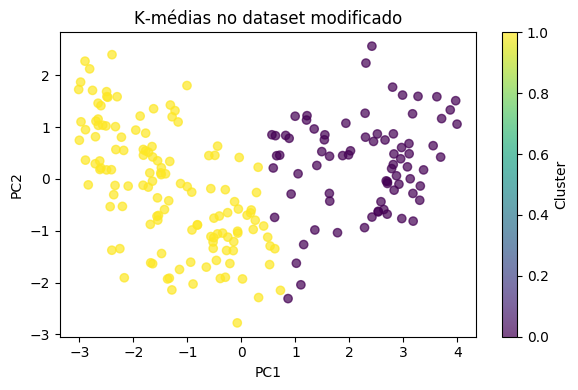

In [193]:
from sklearn.cluster import KMeans                       
from sklearn.preprocessing import StandardScaler        
from sklearn.decomposition import PCA                   
from sklearn.metrics import silhouette_score             
import matplotlib.pyplot as plt                          

X = df_original.drop(columns=["Perímetro", "Classe"])

# Escalonamento dos dados, dados com média 0 e desvio padrão 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definindo o número de clusters (aqui usamos 2 como exemplo)
n_clusters = 2

# Aplicando KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Avaliação do agrupamento usando o Silhouette Score
sil = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.4f}")

# Visualização dos clusters usando PCA para redução de dimensionalidade
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset modificado")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Neste último trecho, mantemos todas as colunas dos dados (exceto "Classe", que é removida para evitar vazamento de informação) e aplicamos o mesmo procedimento de escalonamento, clusterização e avaliação dos grupos formados. Essa etapa possibilita a comparação entre o agrupamento obtido a partir do conjunto original e o conjunto modificado, permitindo uma análise comparativa dos resultados.

Silhouette Score: 0.4615


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'K‑médias no dataset original')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

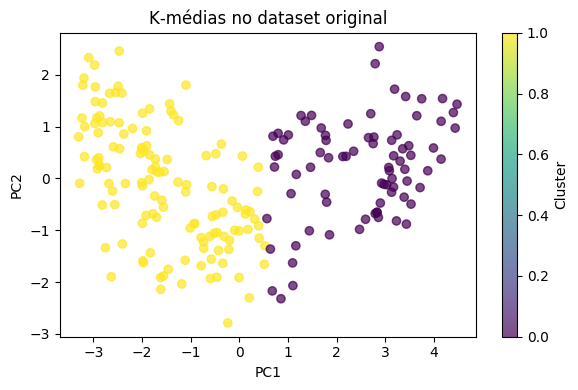

In [194]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_full = df_original.drop(columns=["Classe"])

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled_full)

sil = silhouette_score(X_scaled_full, labels)
print(f"Silhouette Score: {sil:.4f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_full)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset original")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Quando o Silhouette Score do conjunto original é maior do que o do conjunto modificado, isso sugere que os clusters formados com as features originais estão mais  separados. Os atributos removidos podem ter contribuído para uma melhor definição dos grupos, e sua retirada gerou em uma estrutura de agrupamento menos distinta 

Se refizermos o teste mas agora retirando a Compacidade

Silhouette Score: 0.5203


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'K‑médias no dataset modificado')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

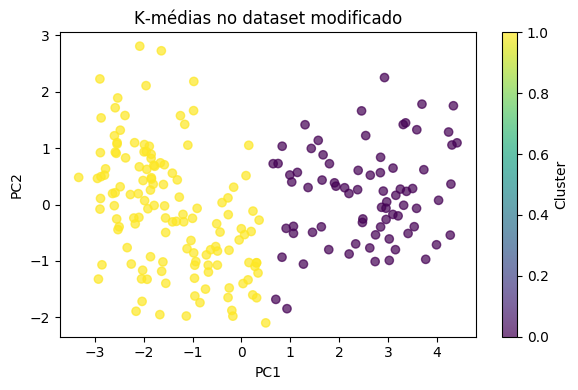

In [195]:

X = df_original.drop(columns=["Compacidade", "Classe"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)


sil = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.4f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset modificado")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Aconteceu da mesma forma que na classificação, o Silhouette Score ficou melhor nesse conjunto modificado, indicando que a remoção de Compacidade melhorou a estrutura dos grupos, deixando melhor separados

--------------------------

In [196]:
# Faz o Jupyter exibir tudo sem cortar
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Etapa 3


Explicação do Relatório de Classificação:

O relatório de classificação é uma ferramenta essencial para avaliar o desempenho de um modelo de classificação. Ele fornece métricas detalhadas para cada classe, além de médias globais.

- precision: O quanto você pode confiar nas previsões do modelo. "Se o modelo disse que é, qual a chance de realmente ser?". Uma alta precisão indica um baixo número de falsos positivos.

- recall: Se o modelo consegue encontrar todos os casos positivos. "De todos os que realmente são, quantos o modelo achou?". Um alto recall indica um baixo número de falsos negativos.

- f1-score: Média harmônica entre precision e recall. Um F1-score alto indica que o modelo tem bom desempenho tanto em termos de precisão quanto de recall.

- support: O número de ocorrências reais de cada classe no conjunto de dados de teste.


Parâmetros usados na classificação com KNN: 

- 'n_neighbors=5': o número de vizinhos usados para classificar cada ponto. Quanto menor o valor, mais sensível o modelo fica ao ruído.
- 'weights': peso dos vizinhos, podem ser 'uniform' ou 'distance'.
    - 'uniform': todos os vizinhos na vizinhança têm o mesmo peso na decisão de classificação.
    - 'distance': os vizinhos mais próximos têm maior influência na classificação.
- 'metric': métrica da distância.
    - 'euclidean': É a distância em linha reta entre dois pontos no espaço euclidiano. É a métrica mais comum.
    - 'manhattan': Também conhecida como "distância da cidade em blocos". É útil quando as dimensões dos dados não são necessariamente relacionadas diretamente.

Teste sem Perímetro

Nesta seção, avaliamos o desempenho do modelo KNN após remover a coluna "Perímetro" do dataset. Isso nos permite investigar se essa característica específica tem um impacto significativo na capacidade de classificação do modelo.

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_teste = df_original.drop(columns=["Perímetro", "Classe"])
y_teste = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X_teste, y_teste, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop por todas as combinações de hiperparâmetros
for n in [3, 5, 7]:
    for w in ['uniform', 'distance']:
        for m in ['euclidean', 'manhattan']:
            print(f"\nTestando com n_neighbors={n}, weights='{w}', metric='{m}'")

            # Instancia e treina o modelo
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)

            acc = accuracy_score(y_test, y_pred)
            print(f"Acurácia: {acc:.4f}")
            print("Relatório de Classificação:")
            print(classification_report(y_test, y_pred))
            print("Matriz de Confusão:")
            print(confusion_matrix(y_test, y_pred))



Testando com n_neighbors=3, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=3, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.90      0.95        21
           3       0.91      0.91      0.91        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 2 19  0]
 [ 2  0 20]]

Testando com n_neighbors=3, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=3, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.90      0.95        21
           3       0.91      0.91      0.91        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 2 19  0]
 [ 2  0 20]]

Testando com n_neighbors=5, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]


Em geral, para os testes sem a coluna "Perímetro", notamos que a acurácia se manteve em torno de 0.90. No entanto, quando n_neighbors é definido como 7 com weights='uniform' e metric='manhattan', a acurácia diminuiu para 0.8889, indicando que um número maior de vizinhos, com pesos uniformes e a métrica de Manhattan, pode não ser a melhor combinação para este dataset sem o perímetro. Observamos que a Classe 2 consistentemente apresenta resultados de classificação muito altos (precision e recall próximos a 1.00), independentemente dos parâmetros, sugerindo que ela é mais facilmente distinguível.

#### Dataset sem a Compacidade

In [198]:

X = df_original.drop(columns=["Compacidade", "Classe"])
y = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop por todas as combinações de hiperparâmetros
for n in [3, 5, 7]:
    for w in ['uniform', 'distance']:
        for m in ['euclidean', 'manhattan']:
            print(f"\nTestando com n_neighbors={n}, weights='{w}', metric='{m}'")

            # Instancia e treina o modelo
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)

            acc = accuracy_score(y_test, y_pred)
            print(f"Acurácia: {acc:.4f}")
            print("Relatório de Classificação:")
            print(classification_report(y_test, y_pred))
            print("Matriz de Confusão:")
            print(confusion_matrix(y_test, y_pred))



Testando com n_neighbors=3, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=3, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=3, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=3, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=5, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean')

Acurácia: 0.9206
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=5, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan')

Acurácia: 0.9206
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=5, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', weights='distance')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=5, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', weights='distance')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=7, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       1.00      0.95      0.98        21
           3       0.83      0.91      0.87        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[16  0  4]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=7, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Acurácia: 0.9206
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=7, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=7, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

Acurácia: 0.9206
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 1  0 21]]


É evidente que a exclusão da coluna "Compacidade" resultou em acurácias mais altas para a maioria das combinações de hiperparâmetros. Isso sugere que a "Compacidade" pode ser uma característica introduz ruído para o modelo KNN neste dataset. A acurácia mais baixa observada com n_neighbors=7, weights='uniform', metric='euclidean' (0.8889) indica que, mesmo com a remoção da compacidade, a combinação de parâmetros ainda pode impactar negativamente o desempenho.

Dataset original

In [199]:

X = df_original.drop(columns=["Classe"])
y = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop por todas as combinações de hiperparâmetros
for n in [3, 5, 7]:
    for w in ['uniform', 'distance']:
        for m in ['euclidean', 'manhattan']:
            print(f"\nTestando com n_neighbors={n}, weights='{w}', metric='{m}'")

            # Instancia e treina o modelo
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)

            acc = accuracy_score(y_test, y_pred)
            print(f"Acurácia: {acc:.4f}")
            print("Relatório de Classificação:")
            print(classification_report(y_test, y_pred))
            print("Matriz de Confusão:")
            print(confusion_matrix(y_test, y_pred))



Testando com n_neighbors=3, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=3, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=3, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=3, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=5, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=5, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', weights='distance')

Acurácia: 0.9365
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       1.00      0.95      0.98        21
           3       0.91      0.95      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 1  0 21]]

Testando com n_neighbors=7, weights='uniform', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='uniform', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Testando com n_neighbors=7, weights='distance', metric='euclidean'


KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Testando com n_neighbors=7, weights='distance', metric='manhattan'


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]


Houveram 4 testes com acurácia = 0.8889

Apenas 2 testes com acurácia = 0.9365

Houveram 6 testes com acurácia = 0.9048

A menor acurácia (0.8889) foi observada em vários testes com n_neighbors=3 ou n_neighbors=7 em diferentes configurações de weights e metric.

--------------------------

#### Teste com K-Means

Seu principal objetivo é dividir um conjunto de dados em um número predefinido de grupos (clusters), onde cada ponto de dado pertence ao cluster cujo centro (centróide) é o mais próximo. Ao contrário da classificação KNN, onde os dados já têm rótulos, no K-Means, o algoritmo descobre a estrutura inerente aos dados.

Parâmetros da técnica K-Means:
- n_clusters: Quantidade de clusters.
- init: Método de inicialização dos centróides.
    - 'k-means++': É o método padrão e geralmente recomendado. Ele seleciona os centróides iniciais de forma inteligente para acelerar a convergência e produzir agrupamentos melhores.
    - 'random': Os centróides são escolhidos aleatoriamente entre os pontos de dados. Pode levar a resultados menos ótimos e requer múltiplas execuções (n_init).
- n_init: Número de vezes que será executado com diferentes inicializações dos centróides.
- max_iter: Número máximo de iterações por execução.
- random_state: Semente para reprodutibilidade (garante que as inicializações aleatórias sejam as mesmas em execuções repetidas, tornando seus resultados consistentes e comparáveis).
- algorithm: Algoritmo que será usado.
    - 'lloyd': O algoritmo clássico do K-Means.
    - 'elkan': Uma versão mais eficiente do algoritmo de Lloyd que usa a desigualdade triangular para evitar cálculos de distância desnecessários, sendo mais rápido para datasets com muitos clusters e dimensões.

Teste sem Perímetro

<Figure size 1500x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3999')

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3999')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2827')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2838')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2759')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2827')

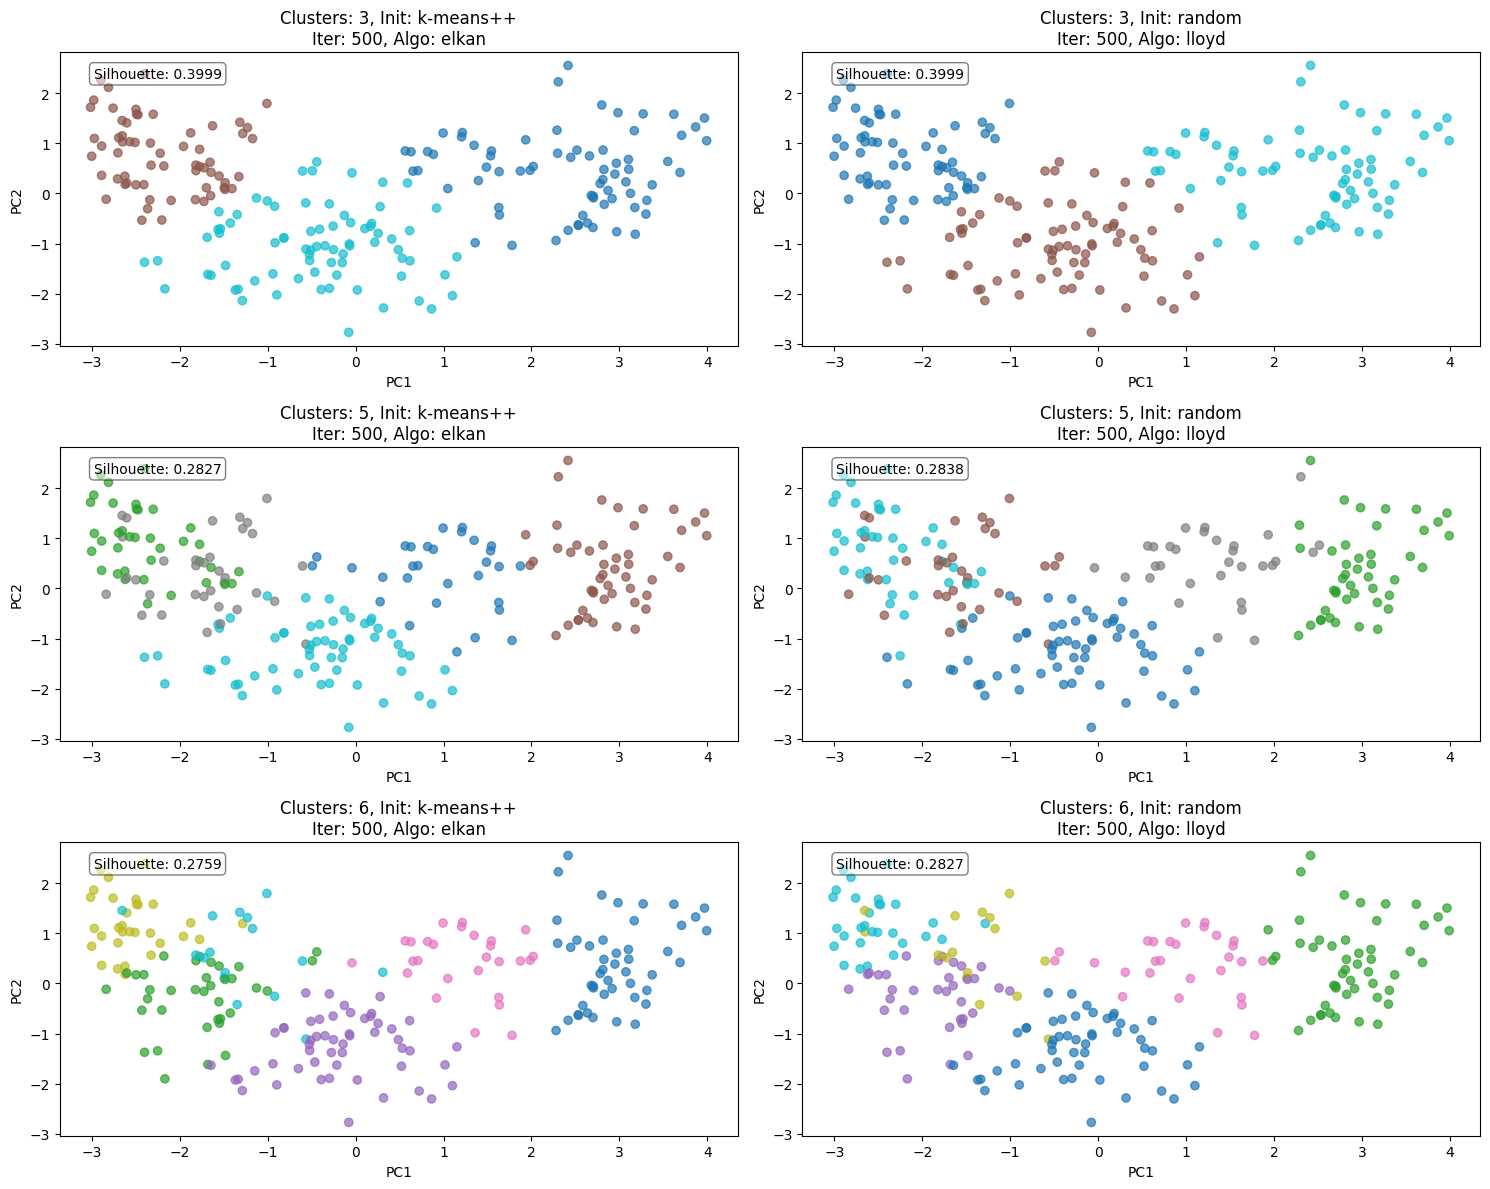

In [216]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df_original.drop(columns=["Perímetro", "Classe"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista com configurações variadas de parâmetros
parametros_kmeans = [
    {"n_clusters": 3, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 3, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 5, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 5, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 6, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 6, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
]

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Gráficos
plt.figure(figsize=(15, 12))

for i, params in enumerate(parametros_kmeans, 1):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        algorithm=params["algorithm"],
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)

    plt.subplot(3, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", alpha=0.7)
    plt.title(f"Clusters: {params['n_clusters']}, Init: {params['init']}\n"
              f"Iter: {params['max_iter']}, Algo: {params['algorithm']}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    # Mostrar Silhouette Score
    plt.text(0.05, 0.95, f"Silhouette: {sil:.4f}", transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()


Teste em dataset original

<Figure size 1500x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3999')

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3999')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2827')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2838')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2759')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.2827')

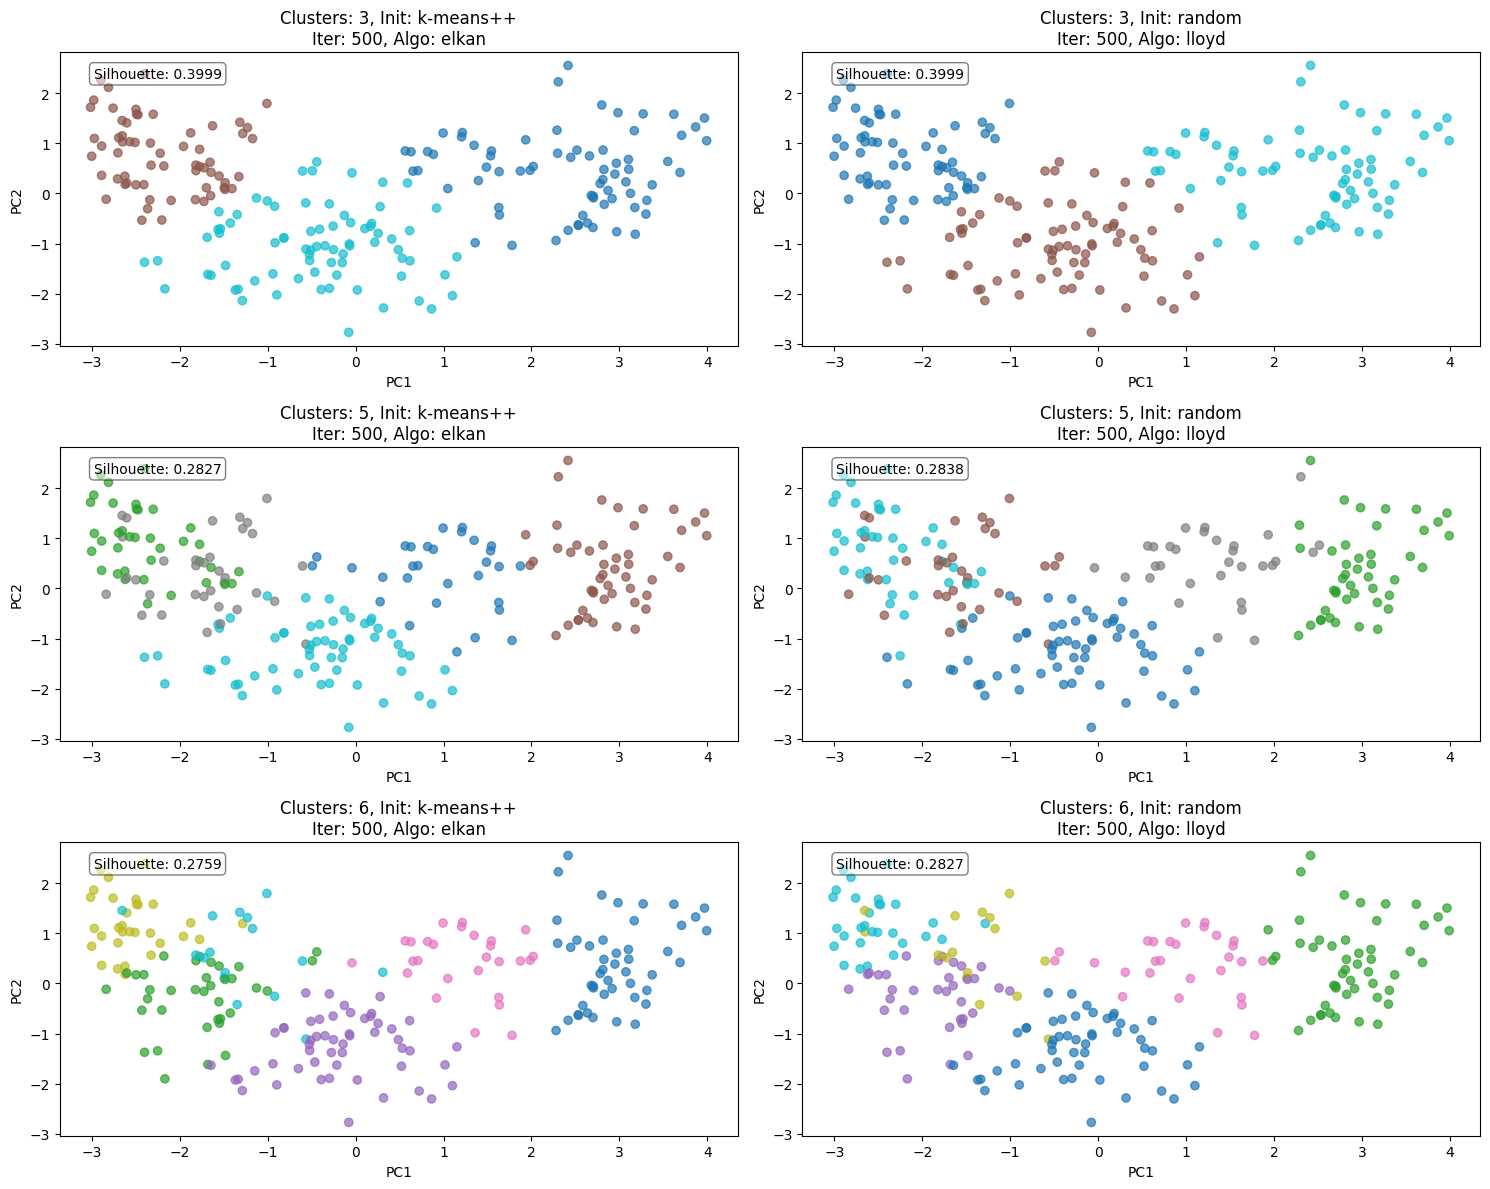

In [201]:
X_full = df_original.drop(columns=["Classe"])

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Lista com configurações variadas de parâmetros
parametros_kmeans = [
    {"n_clusters": 3, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 3, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 5, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 5, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 6, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 6, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
]

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Gráficos
plt.figure(figsize=(15, 12))

for i, params in enumerate(parametros_kmeans, 1):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        algorithm=params["algorithm"],
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)

    plt.subplot(3, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", alpha=0.7)
    plt.title(f"Clusters: {params['n_clusters']}, Init: {params['init']}\n"
              f"Iter: {params['max_iter']}, Algo: {params['algorithm']}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    # Mostrar Silhouette Score
    plt.text(0.05, 0.95, f"Silhouette: {sil:.4f}", transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()


Teste sem Compacidade

<Figure size 1500x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.4365')

<Axes: >

Text(0.5, 1.0, 'Clusters: 3, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.4365')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3118')

<Axes: >

Text(0.5, 1.0, 'Clusters: 5, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3127')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: k-means++\nIter: 500, Algo: elkan')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3097')

<Axes: >

Text(0.5, 1.0, 'Clusters: 6, Init: random\nIter: 500, Algo: lloyd')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.05, 0.95, 'Silhouette: 0.3087')

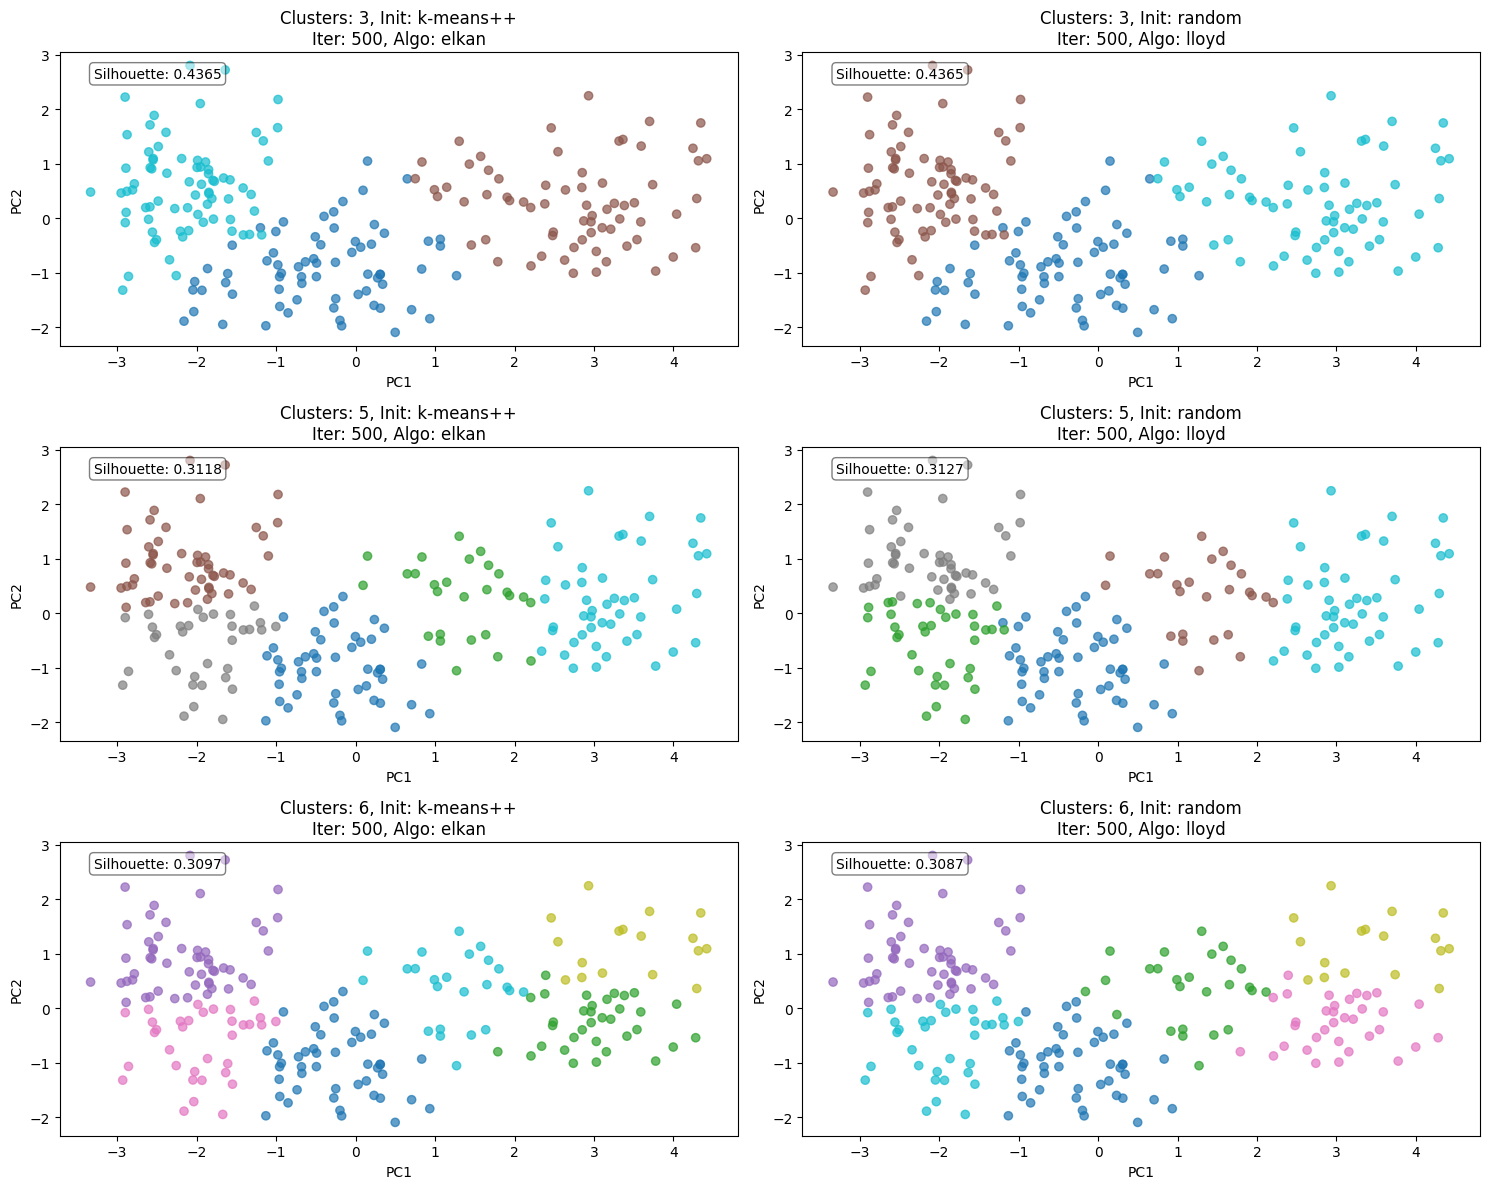

In [218]:
X = df_original.drop(columns=["Compacidade", "Classe"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista com configurações variadas de parâmetros
parametros_kmeans = [
    {"n_clusters": 3, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 3, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 5, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 5, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
    {"n_clusters": 6, "init": "k-means++", "n_init": 30, "max_iter": 500, "algorithm": "elkan"},
    {"n_clusters": 6, "init": "random", "n_init": 30, "max_iter": 500, "algorithm": "lloyd"},
]

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Gráficos
plt.figure(figsize=(15, 12))

for i, params in enumerate(parametros_kmeans, 1):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        algorithm=params["algorithm"],
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)

    plt.subplot(3, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", alpha=0.7)
    plt.title(f"Clusters: {params['n_clusters']}, Init: {params['init']}\n"
              f"Iter: {params['max_iter']}, Algo: {params['algorithm']}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    # Mostrar Silhouette Score
    plt.text(0.05, 0.95, f"Silhouette: {sil:.4f}", transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

Dentre os três exemplos o melhor modo de fazer a análise foi sem a Compacidade, pois em todos os casos o silhouette score resultou acima de 3.